# Title of Project - For NOAA RESTORE

Summary of the work described in the notebok, and how it fits into the NOAA RESTORE project.

Team:
- names
- affiliations

In [1]:
# load libraries, suppress warnings
suppressPackageStartupMessages({
library(ggplot2)
library(leaflet)
library(dplyr)
library(lubridate)
})

## Station Data

Read station coordinates

Upload a small CSV file that contains, at minimum, 
- `Station`
- `Lat`
- `Lon`

Or just use ours.

In [2]:
# Read a CSV file that has 'Station', 'Lat', 'Lon'
#load station locations
df <- read.csv("Locations.csv")

## Map of our Study Area
Define the bounding box for your study area

In [3]:
head(df)

,ID,Lat,Long
,<int>,<dbl>,<dbl>
1,1,34.66675,-84.92828
2,2,34.57711,-84.94185
3,3,34.49564,-84.96522
4,4,34.36092,-85.14023
5,5,34.23993,-84.49467
6,6,34.16315,-84.74105


In [4]:
## Define bounding box
latmin = 30.03395
latmax = 35.19264
lonmin = -84.46094
lonmax = -89.487

In [6]:
# Mobile Bay
leaflet(df) %>%
      addTiles() %>%
      setView(lng = -87.550548, lat = 31.61515849, zoom = 9) %>%
      addRectangles(
        lng1=lonmin, lat1=latmin,
        lng2=lonmax, lat2=latmax,
        fillColor = "transparent") %>%
        addCircles(lng = ~Long, lat = ~Lat, weight = 5,
                radius = 500, popup = ~ID)


HTML widgets cannot be represented in plain text (need html)

## Download and plot station data 

Later, we'll *download* these from databases, but for the demo, we put a small, sample demo file in GitHub.

(For the bigger analysis, we avoid putting data in GitHub...too big and not what git is meant for.)

In [8]:
#Read profile data
df <- read.csv('Simulated_Nitrate_Loading_USGS02428400.csv')
#Clean up the date
#df$Date <- as.Date(df$Date)
#Take a look
head(df)

,Date,Observed.NO3,Simulated.NO3...Calibrated
,<chr>,<dbl>,<int>
1,Jan-85,1430967.8,899200
2,Feb-85,5294835.1,4756000
3,Mar-85,2591074.2,1681000
4,Apr-85,1183980.5,363600
5,May-85,1377917.4,752100
6,Jun-85,576247.5,130200


### The following plots model data of temperature and salinity at sea surface and bottom.

In [ ]:
#General plot options
options(repr.plot.width=15, repr.plot.height=6)

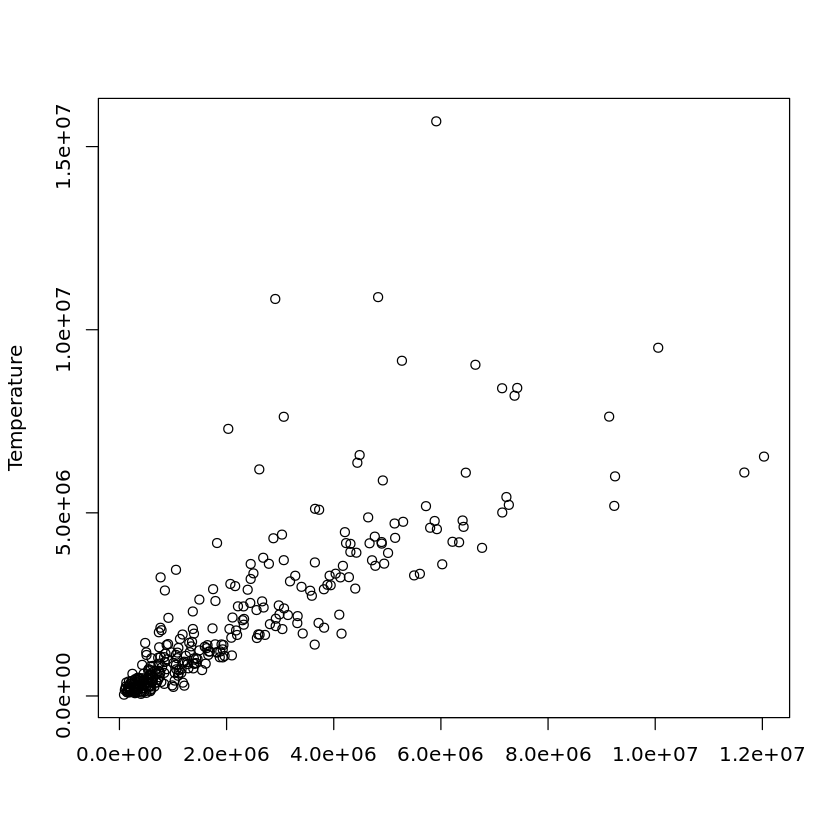

In [10]:
plot(df$Observed.NO3,df$Simulated.NO3...Calibrated,ylab="Temperature",xlab='')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



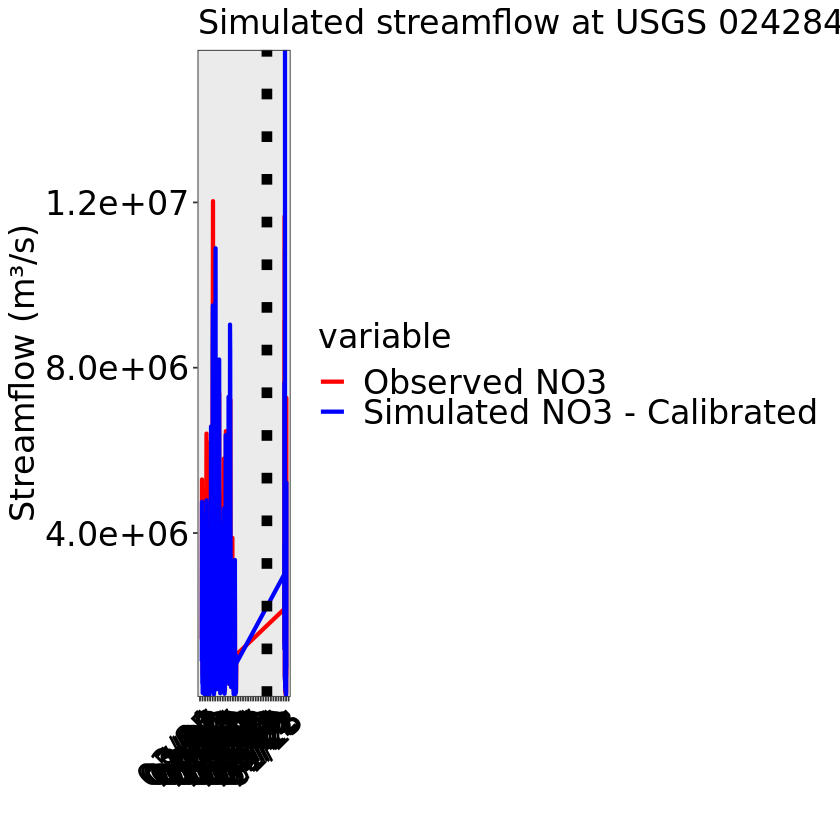

In [15]:
#install.packages("readxl")
install.packages("reshape2")
library("readxl")
data=read_excel("Simulated_Nitrate_Loading_USGS02428400.xlsx")
#data
data$Date<-as.Date(data$Date)
library(reshape2)
library(ggplot2)
meltdata <- melt(data,id="Date")
#tiff("no3.tiff", units="in", width=10, height=5, res=1000)
ggplot(meltdata,aes(x=Date,y=value,color=variable,group=variable,linetype=variable)) + geom_line(size=1.2) + scale_linetype_manual(values=c(1,1,3)) +
  scale_x_date(breaks = "14 month", minor_breaks = "1 week", date_labels = "%m/%y") + geom_vline(xintercept = as.numeric(as.Date("2015-01-01")), linetype="dotted", color="black", size=3) +
  scale_color_manual(values=c("red", "blue", "black")) + labs(x = "", y = "Streamflow (m³/s)",
       title = "Simulated streamflow at USGS 02428400")+
  theme_bw()+
  theme(axis.text.x = element_text(size=20, angle=45, hjust = 1, color = "black"),
        axis.text.y = element_text(size=20, color = "black"),
        legend.text = element_text(size=20),
        legend.title = element_text(size=20),
        plot.title = element_text(size=20),
        axis.title=element_text(size=20))+
  scale_y_continuous(expand = c(0,1))
#dev.off()